<a href="https://colab.research.google.com/github/sdasilvas/NGG6050/blob/main/9.11.24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

**Exercise 1**

Assume that there are 10 quanta available in a nerve terminal, and for a given release event each is released with a probability of 0.2. For one such event, what is the probability that 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, or 10 quanta will be released?

In [4]:
import numpy as np
from scipy.stats import binom

# Parameters
n = 10  # Number of trials
p = 0.2  # Probability of success

# Calculate probabilities
probabilities = binom.pmf(np.arange(n+1), n, p)

# Print results
for k, prob in enumerate(probabilities):
    print(f"Probability of {k} quanta released: {prob:.4f}")

Probability of 0 quanta released: 0.1074
Probability of 1 quanta released: 0.2684
Probability of 2 quanta released: 0.3020
Probability of 3 quanta released: 0.2013
Probability of 4 quanta released: 0.0881
Probability of 5 quanta released: 0.0264
Probability of 6 quanta released: 0.0055
Probability of 7 quanta released: 0.0008
Probability of 8 quanta released: 0.0001
Probability of 9 quanta released: 0.0000
Probability of 10 quanta released: 0.0000


**Exercise 2**
Let's say you know that a given nerve terminal contains exactly 14 quanta available for release. The release probability of these quanta is 0.1. To assess whether this value is reasonable, you run a simple experiment: activate the nerve and measure the number of quanta that are released. The result is 8 quanta. What is the probability that you would get this result (8 quanta) if the true probability of release really was 0.1? What about if the true release probability was much higher; say, 0.7? What about for each decile of release probability (0.1, 0.2, ... 1.0)? Which value of release probability did you determine to be the most probable, given your measurement?

Note: here you are computing a likelihood function: a function describing how the value of the conditional probability p(data | parameters) changes when you hold your data fixed to the value(s) you measured and vary the value(s) of the parameter(s) of, in this case, the binomial distribution.

In [ ]:
from scipy.stats import binom

# Parameters
n = 14  # Number of trials (quanta available for release)
k = 8   # Number of successes (quanta released)
p = 0.1  # Probability of success

# Calculate the probability of exactly k successes
probability = binom.pmf(k, n, p)

print(f"The probability of observing exactly {k} quanta released out of {n} with a release probability of {p} is: {probability:.4f}")


In [6]:
import numpy as np
from scipy.stats import binom

# Parameters
n = 14  # Number of trials
k = 8   # Number of successes (quanta released)

# Define the range of probabilities (deciles from 0.1 to 1.0)
probabilities = np.arange(0.1, 1.1, 0.1)

# Compute the likelihood for each probability value
likelihoods = binom.pmf(k, n, probabilities)

# Print results for specific probabilities
print(f"Probability of observing exactly {k} quanta released out of {n}:")
print(f"  Probability p = 0.7: {likelihoods[6]:.4f}")

# Print likelihoods for each decile
for p, likelihood in zip(probabilities, likelihoods):
    print(f"  Probability p = {p:.1f}: {likelihood:.4f}")

# Determine the most probable release probability
most_probable_p = probabilities[np.argmax(likelihoods)]
print(f"\nMost probable release probability given the measurement: {most_probable_p:.1f}")


Probability of observing exactly 8 quanta released out of 14:
  Probability p = 0.7: 0.1262
  Probability p = 0.1: 0.0000
  Probability p = 0.2: 0.0020
  Probability p = 0.3: 0.0232
  Probability p = 0.4: 0.0918
  Probability p = 0.5: 0.1833
  Probability p = 0.6: 0.2066
  Probability p = 0.7: 0.1262
  Probability p = 0.8: 0.0322
  Probability p = 0.9: 0.0013
  Probability p = 1.0: 0.0000

Most probable release probability given the measurement: 0.6


**Exercise 3**
Not feeling convinced by your single experiment (good scientist!), you repeat it under identical conditions. This time you measure 5 quanta that were released. Your sample size has now doubled, to two measurements. You now want to take into account both measurements when you assess the likelihoods of different possible values of the underlying release probability. To do so, assume that the two measurements in this sample are independent of one another. In this case, the total likelihood is simply the product of the likelihoods associated with each separate measurement. It is also typical to compute the logarithm of each likelihood and take their sum, which is often more convenient.
What are the values of the total likelihood and total log-likelihood in this example, if we assume that the true release probability is 0.1?

Of course, knowing those values of the likelihood and log-likelihood is not particularly useful until you can compare them to the values computed for other possible values for the release probability, so you can determine which value of release probability is most likely, given the data. Therefore, compute the full likelihood and log-likelihood functions using deciles of release probability between 0 and 1. What is the maximum value? Can you improve your estimate by computing the functions at a higher resolution? How does the estimate improve as you increase the sample size?

In [7]:
from scipy.stats import binom
import numpy as np

# Parameters
n = 14  # Number of trials
p = 0.1  # True release probability

# Observations
k1 = 8  # Quanta released in first measurement
k2 = 5  # Quanta released in second measurement

# Calculate individual likelihoods
likelihood1 = binom.pmf(k1, n, p)
likelihood2 = binom.pmf(k2, n, p)

# Calculate total likelihood
total_likelihood = likelihood1 * likelihood2

# Calculate total log-likelihood
log_likelihood1 = np.log(likelihood1)
log_likelihood2 = np.log(likelihood2)
total_log_likelihood = log_likelihood1 + log_likelihood2

# Print results
print(f"Total Likelihood: {total_likelihood:.4e}")
print(f"Total Log-Likelihood: {total_log_likelihood:.4f}")


Total Likelihood: 1.2378e-07
Total Log-Likelihood: -15.9047


In [9]:
import numpy as np
from scipy.stats import binom

# Parameters
n = 14  # Number of trials
k1 = 8  # Quanta released in the first measurement
k2 = 5  # Quanta released in the second measurement

# Define the range of probabilities (deciles from 0.1 to 1.0)
probabilities = np.arange(0.1, 1.1, 0.1)

# Initialize lists to store likelihoods and log-likelihoods
likelihoods = []
log_likelihoods = []

# Small constant to avoid log(0)
epsilon = 1e-10

# Compute likelihoods and log-likelihoods for each probability value
for p in probabilities:
    # Calculate individual likelihoods
    likelihood1 = binom.pmf(k1, n, p)
    likelihood2 = binom.pmf(k2, n, p)

    # Add small constant to avoid zero
    likelihood1 = max(likelihood1, epsilon)
    likelihood2 = max(likelihood2, epsilon)

    # Calculate total likelihood
    total_likelihood = likelihood1 * likelihood2
    likelihoods.append(total_likelihood)

    # Calculate log-likelihood
    log_likelihood1 = np.log(likelihood1)
    log_likelihood2 = np.log(likelihood2)
    total_log_likelihood = log_likelihood1 + log_likelihood2
    log_likelihoods.append(total_log_likelihood)

# Convert lists to numpy arrays for easier manipulation
likelihoods = np.array(likelihoods)
log_likelihoods = np.array(log_likelihoods)

# Find the maximum values
max_likelihood = np.max(likelihoods)
max_log_likelihood = np.max(log_likelihoods)

# Find the corresponding probabilities
best_p_likelihood = probabilities[np.argmax(likelihoods)]
best_p_log_likelihood = probabilities[np.argmax(log_likelihoods)]

# Print results
print(f"Maximum Likelihood: {max_likelihood:.4e}")
print(f"Probability with Maximum Likelihood: {best_p_likelihood:.1f}")

print(f"Maximum Log-Likelihood: {max_log_likelihood:.4f}")
print(f"Probability with Maximum Log-Likelihood: {best_p_log_likelihood:.1f}")


Maximum Likelihood: 2.2396e-02
Probability with Maximum Likelihood: 0.5
Maximum Log-Likelihood: -3.7989
Probability with Maximum Log-Likelihood: 0.5


In [10]:
import numpy as np
from scipy.stats import binom

# Parameters
n = 14  # Number of trials
k1 = 8  # Quanta released in the first measurement
k2 = 5  # Quanta released in the second measurement

# Define the range of probabilities with higher resolution
probabilities = np.arange(0.01, 1.01, 0.01)

# Initialize lists to store likelihoods and log-likelihoods
likelihoods = []
log_likelihoods = []

# Small constant to avoid log(0)
epsilon = 1e-10

# Compute likelihoods and log-likelihoods for each probability value
for p in probabilities:
    # Calculate individual likelihoods
    likelihood1 = binom.pmf(k1, n, p)
    likelihood2 = binom.pmf(k2, n, p)

    # Add small constant to avoid zero
    likelihood1 = max(likelihood1, epsilon)
    likelihood2 = max(likelihood2, epsilon)

    # Calculate total likelihood
    total_likelihood = likelihood1 * likelihood2
    likelihoods.append(total_likelihood)

    # Calculate log-likelihood
    log_likelihood1 = np.log(likelihood1)
    log_likelihood2 = np.log(likelihood2)
    total_log_likelihood = log_likelihood1 + log_likelihood2
    log_likelihoods.append(total_log_likelihood)

# Convert lists to numpy arrays for easier manipulation
likelihoods = np.array(likelihoods)
log_likelihoods = np.array(log_likelihoods)

# Find the maximum values
max_likelihood = np.max(likelihoods)
max_log_likelihood = np.max(log_likelihoods)

# Find the corresponding probabilities
best_p_likelihood = probabilities[np.argmax(likelihoods)]
best_p_log_likelihood = probabilities[np.argmax(log_likelihoods)]

# Print results
print(f"Maximum Likelihood: {max_likelihood:.4e}")
print(f"Probability with Maximum Likelihood: {best_p_likelihood:.2f}")

print(f"Maximum Log-Likelihood: {max_log_likelihood:.4f}")
print(f"Probability with Maximum Log-Likelihood: {best_p_log_likelihood:.2f}")


Maximum Likelihood: 2.4031e-02
Probability with Maximum Likelihood: 0.46
Maximum Log-Likelihood: -3.7284
Probability with Maximum Log-Likelihood: 0.46


Higher resolution --> more accurate estimate of the release probability.

As you increase the sample size, the precision of your estimate improves because the likelihood function becomes more sharply peaked around the true probability, making it easier to identify the maximum.

**Exercise 4**
You keep going and conduct 100 separate experiments and end up with these results:

What is the most likely value of p (which we typically refer to as p-hat and represents the maximum-likelihood estimate of a parameter in the population given our sample with a resolution of 0.01?

BONUS: Use a fitting procedure to find p-hat.

In [11]:
import numpy as np
from scipy.stats import binom

# Data from experiments
counts = np.array([0, 0, 3, 7, 10, 19, 26, 16, 16, 5, 5, 0, 0, 0, 0])
n_experiments = 100

# Define the range of probabilities with higher resolution
probabilities = np.arange(0.01, 1.01, 0.01)

# Initialize list to store likelihoods
likelihoods = []

# Compute likelihoods for each probability value
for p in probabilities:
    # Calculate the likelihood for observing the given counts
    likelihood = np.prod([binom.pmf(k, 14, p) ** count for k, count in enumerate(counts)])
    likelihoods.append(likelihood)

# Convert list to numpy array for easier manipulation
likelihoods = np.array(likelihoods)

# Find the maximum likelihood and the corresponding probability
max_likelihood = np.max(likelihoods)
best_p = probabilities[np.argmax(likelihoods)]

# Print results
print(f"Maximum Likelihood: {max_likelihood:.4e}")
print(f"Probability with Maximum Likelihood (p-hat): {best_p:.2f}")


Maximum Likelihood: 1.1642e-95
Probability with Maximum Likelihood (p-hat): 0.44


**Exercise 5**

Let's say that you have run an exhaustive set of experiments on this synapse and have determined that the true release probability is 0.3 (within some very small tolerance). Now you want to test whether changing the temperature of the preparation affects the release probability. So you change the temperature, perform the experiment, and measure 7 quantal events for the same 14 available quanta. Compute "p-hat".

In [12]:
import numpy as np
from scipy.stats import binom

# New measurement
k = 7  # Quanta released in the new measurement
n = 14  # Number of trials

# Define the range of probabilities with higher resolution
probabilities = np.arange(0.01, 1.01, 0.01)

# Initialize list to store likelihoods
likelihoods = []

# Compute likelihoods for each probability value
for p in probabilities:
    # Calculate the likelihood for observing 7 quantal events out of 14
    likelihood = binom.pmf(k, n, p)
    likelihoods.append(likelihood)

# Convert list to numpy array for easier manipulation
likelihoods = np.array(likelihoods)

# Find the maximum likelihood and the corresponding probability
max_likelihood = np.max(likelihoods)
best_p = probabilities[np.argmax(likelihoods)]

# Print results
print(f"Maximum Likelihood: {max_likelihood:.4e}")
print(f"Probability with Maximum Likelihood (p-hat): {best_p:.2f}")


Maximum Likelihood: 2.0947e-01
Probability with Maximum Likelihood (p-hat): 0.50


Standard statistical inference now asks the question, what is the probability that you would have obtained that measurement given a Null Hypothesis of no effect? In this case, no effect corresponds to an unchanged value of the true release probability (i.e., its value remained at 0.3 even with the temperature change). What is the probability that you would have gotten that measurement if your Null Hypothesis were true? Can you conclude that temperature had an effect?

In [13]:
from scipy.stats import binom

# Parameters for the null hypothesis
p_null = 0.3  # Null hypothesis probability
n = 14  # Number of trials
k_observed = 7  # Number of quantal events observed

# Compute the p-value as the probability of observing 7 or more successes
p_value = 1 - binom.cdf(k_observed - 1, n, p_null)

print(f"P-value: {p_value:.4f}")


P-value: 0.0933


Since P > 0.05, reject the null hypothesis. Therefore, can conclude that temperature did not significantly affect the release probability.  

**Bonus**

Do the quantal event numbers follow a binomial distribution? If so, then that would lend support to the idea that the events are generated by a process that can be characterized in terms of the number of available quanta and the average probability of release of each quantum.

Provide a qualitative answer to this question by comparing the empirical distributions (see the data table, above) to the predicted binomial distribution.

my answer: yes, the predicted temperatures (lines) align well with the empirical data (plots), though there is some more deviation between the predicted and empirical values at 4°C.


Temperature 4.0°C:
Estimated probability of release (p): 0.0442
Estimated number of trials (n): 7.35

Temperature 3.5°C:
Estimated probability of release (p): 0.0515
Estimated number of trials (n): 10.50

Temperature 0.0°C:
Estimated probability of release (p): 0.0755
Estimated number of trials (n): 4.72

Temperature 2.0°C:
Estimated probability of release (p): 0.1094
Estimated number of trials (n): 6.42

Temperature 6.5°C:
Estimated probability of release (p): 0.2106
Estimated number of trials (n): 4.16

Temperature 3.0°C:
Estimated probability of release (p): 0.4934
Estimated number of trials (n): 2.76



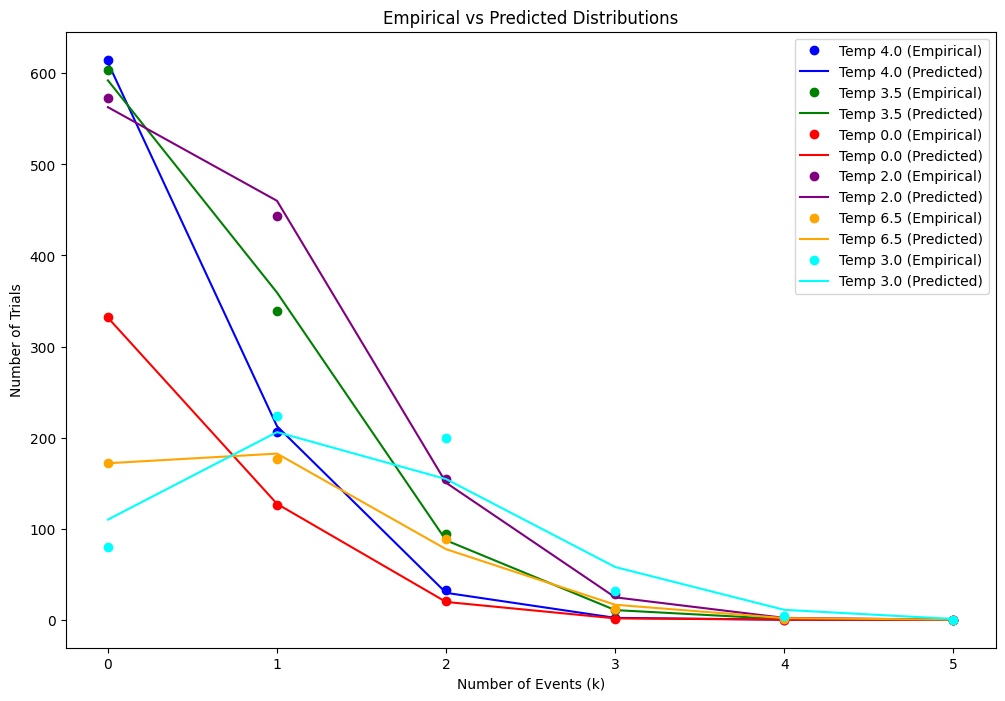

In [23]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

# Empirical data from experiments
data = {
    '4.0': [615, 206, 33, 2, 0, 0],
    '3.5': [604, 339, 94, 11, 2, 0],
    '0.0': [332, 126, 21, 1, 0, 0],
    '2.0': [573, 443, 154, 28, 2, 0],
    '6.5': [172, 176, 89, 12, 1, 0],
    '3.0': [80, 224, 200, 32, 4, 0]
}

# Define the range of k values
k_values = np.arange(0, 6)

# Function to compute p and n
def compute_p_and_n(counts):
    total_trials = np.sum(counts)
    # Compute mean and variance
    mean = np.sum(k_values * counts) / total_trials
    variance = np.sum(((k_values - mean) ** 2) * counts) / total_trials

    # Compute p and n
    p = 1 - (variance / mean)
    n = mean / p
    return p, n

# Calculate and print p and n for each temperature
for temp, counts in data.items():
    p, n = compute_p_and_n(counts)
    print(f"Temperature {temp}°C:")
    print(f"Estimated probability of release (p): {p:.4f}")
    print(f"Estimated number of trials (n): {n:.2f}\n")

# Define colors for each temperature
colors = {
    '4.0': 'blue',
    '3.5': 'green',
    '0.0': 'red',
    '2.0': 'purple',
    '6.5': 'orange',
    '3.0': 'cyan'
}

# Plot empirical vs predicted distributions
plt.figure(figsize=(12, 8))
for temp, counts in data.items():
    # Calculate total number of trials and events
    total_trials = np.sum(counts)
    total_events = np.sum([k * count for k, count in zip(k_values, counts)])

    # Estimate average probability of release p
    p_est = total_events / (total_trials * np.max(k_values))

    # Calculate predicted binomial probabilities
    predicted_probs = binom.pmf(k_values, np.max(k_values), p_est)

    # Normalize predicted probabilities
    predicted_counts = predicted_probs * total_trials

    # Plot empirical and predicted distributions with custom colors
    plt.plot(k_values, counts, 'o', color=colors[temp], label=f'Temp {temp} (Empirical)')
    plt.plot(k_values, predicted_counts, color=colors[temp], linestyle='-', label=f'Temp {temp} (Predicted)')

plt.xlabel('Number of Events (k)')
plt.ylabel('Number of Trials')
plt.legend()
plt.title('Empirical vs Predicted Distributions')
plt.show()




Updating the code to include Poisson distribution:

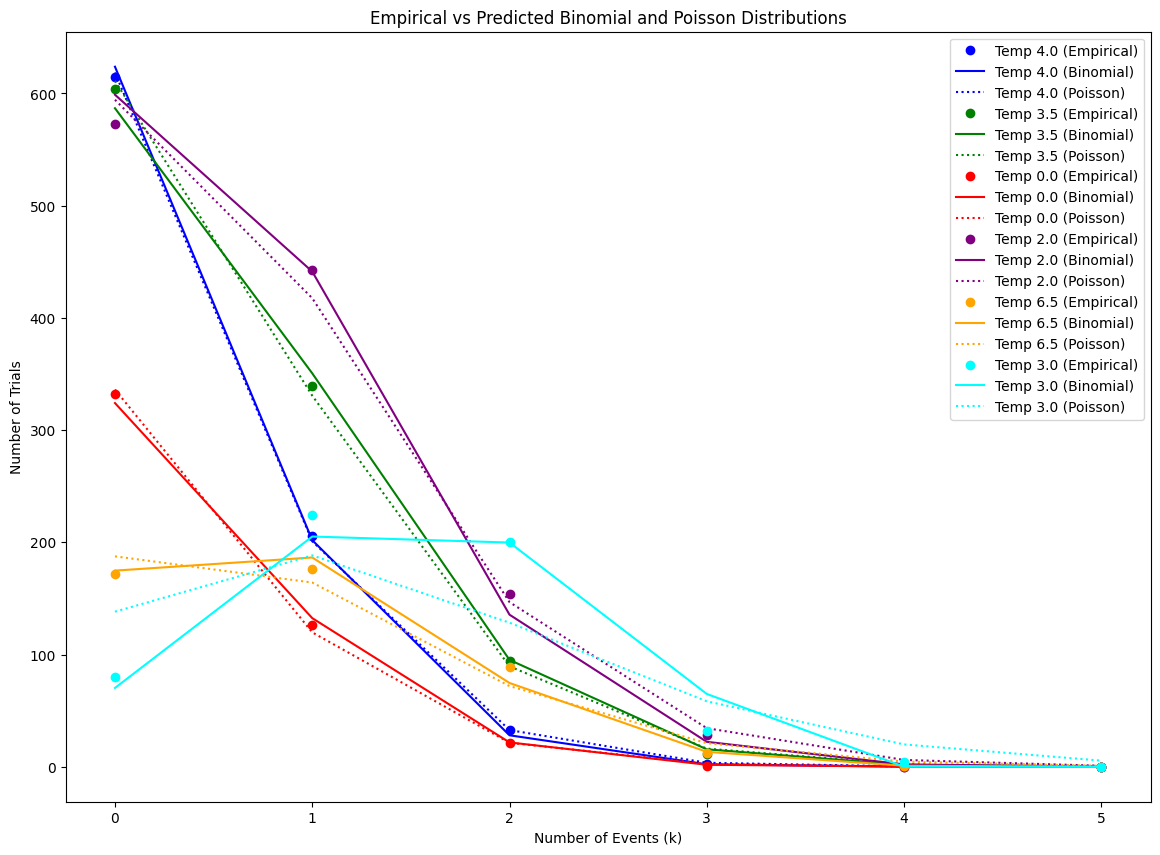

In [27]:
import numpy as np
from scipy.stats import binom, poisson
import matplotlib.pyplot as plt

# Empirical data from experiments
data = {
    '4.0': [615, 206, 33, 2, 0, 0],
    '3.5': [604, 339, 94, 11, 2, 0],
    '0.0': [332, 126, 21, 1, 0, 0],
    '2.0': [573, 443, 154, 28, 2, 0],
    '6.5': [172, 176, 89, 12, 1, 0],
    '3.0': [80, 224, 200, 32, 4, 0]
}

# Define the range of k values
k_values = np.arange(0, 6)

# Function to compute p and n for binomial
def compute_p_and_n(counts):
    total_trials = np.sum(counts)
    mean = np.sum(k_values * counts) / total_trials
    variance = np.sum(((k_values - mean) ** 2) * counts) / total_trials
    p = 1 - (variance / mean)
    n = mean / p
    return p, n

# Plot empirical vs predicted distributions
plt.figure(figsize=(14, 10))

for temp, counts in data.items():
    total_trials = np.sum(counts)
    mean = np.sum(k_values * counts) / total_trials

    # Compute binomial parameters
    p, n = compute_p_and_n(counts)

    # Calculate predicted binomial probabilities
    predicted_binomial_probs = binom.pmf(k_values, int(np.round(n)), p)
    predicted_binomial_counts = predicted_binomial_probs * total_trials

    # Calculate predicted Poisson probabilities
    predicted_poisson_probs = poisson.pmf(k_values, mean)
    predicted_poisson_counts = predicted_poisson_probs * total_trials

    # Plot empirical data
    plt.plot(k_values, counts, 'o', color=colors[temp], label=f'Temp {temp} (Empirical)')

    # Plot predicted binomial distribution
    plt.plot(k_values, predicted_binomial_counts, linestyle='-', color=colors[temp], label=f'Temp {temp} (Binomial)')

    # Plot predicted Poisson distribution
    plt.plot(k_values, predicted_poisson_counts, linestyle=':', color=colors[temp], label=f'Temp {temp} (Poisson)')

plt.xlabel('Number of Events (k)')
plt.ylabel('Number of Trials')
plt.legend()
plt.title('Empirical vs Predicted Binomial and Poisson Distributions')
plt.show()
